In [1]:
import torch
import torchvision
import numpy as np
from dataset_class import get_data, classes_RW, config
import seaborn as sns
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/bzzt/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.backends.cudnn.deterministic = True
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

device = torch.device(
    "cuda:0"
    if torch.cuda.is_available()
    else "mps:0" if torch.backends.mps.is_available() else "cpu"
)

train_data, val_data, test_data = get_data(0), get_data(2), get_data(1)

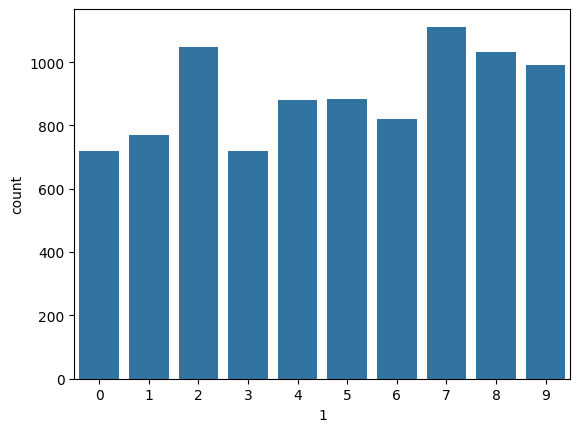

In [3]:
sns.countplot(x = train_data.img_labels[1])
plt.show()

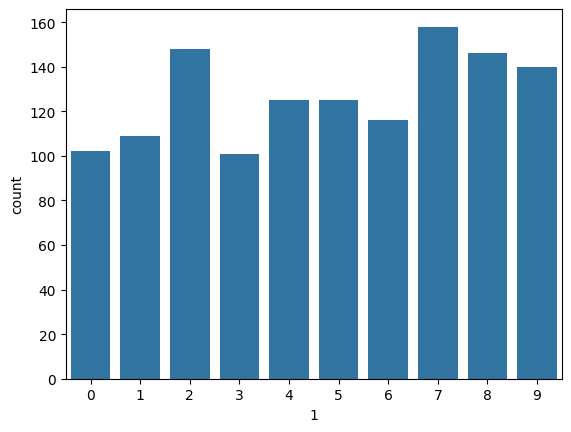

In [4]:
sns.countplot(x = val_data.img_labels[1])
plt.show()

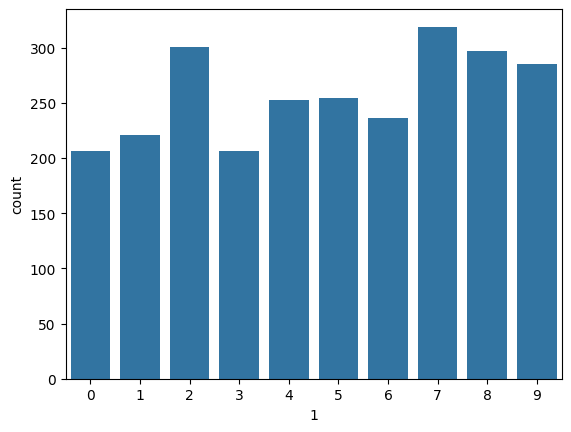

In [5]:
sns.countplot(x = test_data.img_labels[1])
plt.show()

In [6]:
train_loader, test_loader, val_loader = get_data(value=0, loader=True), get_data(value=2, loader=True), get_data(value=1, loader=True)

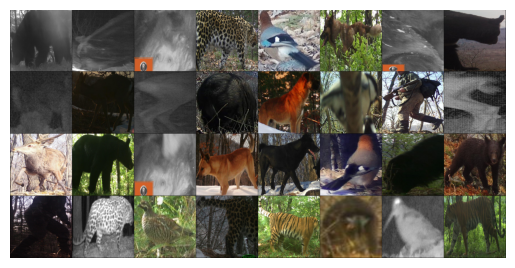

brown_bear brown_bear brown_bear amur_leopard birds dog   brown_bear black_bear dog   roe_deer roe_deer wild_boar dog   birds people sika_deer sika_deer brown_bear brown_bear dog   dog   birds brown_bear black_bear people amur_leopard birds amur_leopard amur_tiger sika_deer birds amur_tiger


In [7]:
def imshow(img):
    npimg = img.numpy()
    plt.axis('off') 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes_RW[int(labels[j])]:5s}' for j in range(config["batch_size"])))

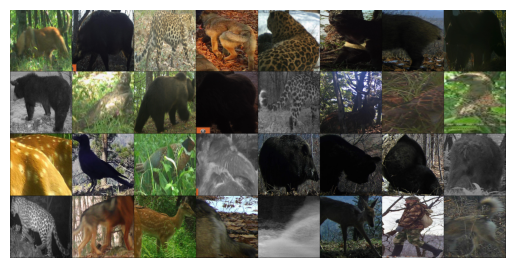

dog   wild_boar amur_leopard people amur_leopard black_bear wild_boar black_bear black_bear birds brown_bear brown_bear amur_leopard sika_deer birds birds sika_deer birds birds brown_bear wild_boar brown_bear black_bear wild_boar amur_leopard dog   sika_deer dog   brown_bear roe_deer people dog  


In [8]:
dataiter = iter(val_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes_RW[int(labels[j])]:5s}' for j in range(config["batch_size"])))

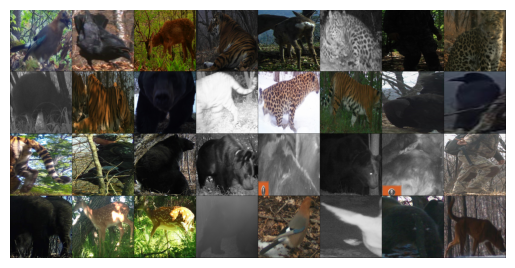

birds birds sika_deer amur_tiger roe_deer amur_leopard people amur_leopard wild_boar amur_tiger brown_bear amur_tiger amur_leopard amur_tiger birds birds amur_tiger people black_bear brown_bear brown_bear brown_bear brown_bear people wild_boar sika_deer sika_deer brown_bear birds roe_deer brown_bear dog  


In [9]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes_RW[int(labels[j])]:5s}' for j in range(config["batch_size"])))